<a href="https://colab.research.google.com/github/Jihyun13579/ESAA/blob/main/1030(%EC%9B%94)_%EA%B3%BC%EC%A0%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_ch8_6~9_(7_%EC%A0%9C%EC%99%B8)_pg_512~516%2C_529~543_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1030(월) 과제_파이썬 머신러닝 완벽 가이드 ch8. 6~9 (7 제외) pg. 512 ~ 516, 529 ~ 543 필사
### 2129014 박지현

# CH08. 텍스트 분석

## CH08.06. 토픽 모델링(Topic Modeling) - 20 뉴스그룹
- 토픽 모델링(Topic Modeling) : 문서 집합에 숨어 있는 주제를 찾아내는 것
 - 더 함축적인 의미로 문장을 요약하는 사람의 토픽 모델링 <-> 숨겨진 주제를 효과적으로 표현할 수 있는 중심단어 함축적으로 추출하는 머신러닝 기반 토픽 모델
 - 자주 사용되는 기법 : LSA(Latent Semantic Analysis) & LDA(Latent Dirichlet Allocation, 차원 축소의 LDA와 다른 알고리즘)

**토픽 모델링의 기법인 LDA를 20 뉴스그룹 데이터 세트를 이용해 적용하기**
- 데이터 : 20가지 주제를 가진 뉴스그룹의 데이터
- 원본 20가지 > 8가지 주제 추출 후 텍스트에 LDA 기반 토픽 모델링 적용하기
- 사이킷런: LDA 기반 토빅 모델링 LatentDirichetAllocation

1. fetch_20newsgroups() API의 categories 파라미터를 토해 필요한 주제만 필터링해 추출한 후 추출된 텍스트를 Count 기반으로 벡터화 변환하기
 - LDA : Count 기반의 벡터화만 사용

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출.
cats = ["rec.motorcycles", "rec.sport.baseball", "comp.graphics", "comp.windows.x",
        "talk.politics.mideast", "soc.religion.christian", "sci.electronics", "sci.med"]

# 위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset = "all", remove = ("headers", "footers", "quotes"),
                             categories = cats, random_state = 0)

# LDA는 Count기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df = 0.95, max_features = 1000, min_df = 2, stop_words = "english",
                             ngram_range = (1, 2))
feat_vect = count_vect.fit_transform(news_df.data)
print("CountVectorizer Shape: ", feat_vect.shape)

CountVectorizer Shape:  (7862, 1000)


> feat_vect : 7862개의 문서가 1000개의 피처로 구성된 피처 벡터화된 데이터셋

2. 피처 벡터화된 feat_vect 데이터 세트 기반 LDA 토픽 모델링 수
 - n_components : 토픽의 개수 조정

In [2]:
lda = LatentDirichletAllocation(n_components = 8, random_state = 0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

3. LatentDirichletAllocation 객체의 속성값 components_의 형태와 속성값 확인하기
 - components_ : 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당되었는지에 대한 수치 가지고 있음, 높은 값일수록 해당 word 피처는 그 토픽의 중심 word

In [3]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

4. display_topics() 함수 만들어서 각 토픽별로 연관도가 높은 순으로 Word 나열하기
- components: (8,1000) > 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값 가지고 있음
- lda_model.components_ 값만으로는 각 토픽별 word 연관도 보기 어려움 > 함수 생성하기

In [4]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print("Topic #", topic_index)

    # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word features 추출 후 join으로 concat
    feature_concat = " ".join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_feature_names()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


> 8개의 주제(모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학)를 주제로 모델링이 잘 되었는가?
 - Topic #0, Topic #5, Topic #7이 주로 애매한 주제어 추출됨, 특히 모토사이클, 야구 주제의 경우 명확한 주제어차 추출되지 않음

## CH08.08. 문서 유사도

### 문서 유사도 측정 방법 - 코사인 유사도
문서와 문서 간의 유사도 비교: 일반적으로 코사인 유사도(Cosine Similarity) 사용

**코사인 유사도** : 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것
- 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반함


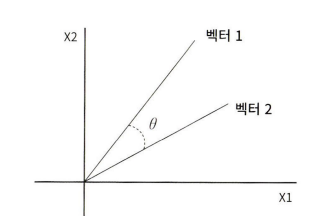

### 두 벡터 사잇각
두 벡터의 사잇각에 따라서 상호관계는 다음과 같이 1.유사하거나, 2.관련이 없거나, 3. 아예 반대 관계가 될 수 있음

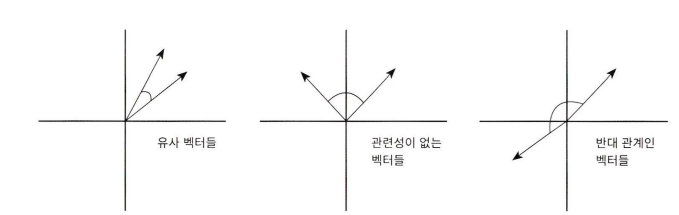

- 두 벡터 A와 B의 코사인 값
: 두 벡터 A와 B의 내적 값은 두 벡터의 크기를 곱한 값의 코사인 각도 값을 곱한 것

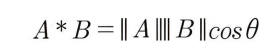

- 즉, 유사도 **$cos(theta)$**는 다음과 같이 두 벡터의 내적으로 총 벡터 크기의 합으로 나눈 것 (= 내적 결과를 총 벡터의 크기로 정규화(L2 Norm)한 것)

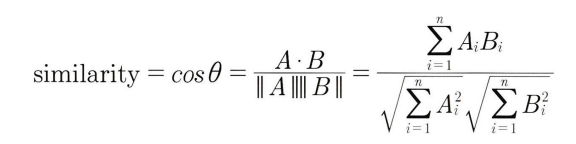

- 코사인 유사도가 문서의 유사도 비교에 가장 많이 사용되는 이유
1. 문서를 피처 벡터화 변호나 시 차원이 매우 많은 희소 행렬이 되기 쉬움 > 희소행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉬웁
2. 문서가 매우 긴 경우, 단어의 빈도수도 더 많음 > 빈도수에만 기반 시, 공정한 비교를 할 수 X (ex. 10페이지 '머신러닝' 5번 vs 1페이지 '머신러닝' 3번)

**간단한 문서에 대해서 서로 간의 문서 유사도를 코사인 유사도 기반으로 구해보기**


1. 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 cos_similarity() 함수 작성하기

In [5]:
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity

2. doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환하기

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ["if you take the blue pill, the story ends",
            "if you take the red pill, you stay in Wonderland",
            "if you take the red pill, I show you how deep the rabbit hole goes"]

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


> 반환된 행렬: 희소행렬

3. 반환된 희소 행렬을 밀집 행렬로 변환한 뒤 각각을 배열로 변환 > 문서의 피처 벡터화 > 문서의 피처 벡터로 cos_similarity() 함수를 이용해 두 개 문서의 유사도 측정하기

In [7]:
# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환.
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print("문장 1, 문장 2 Cosine 유사도: {0:.3f}".format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


> 첫 번째 문장과 두 번째 문장의 코사인 유사도 : 0.402

4. 첫 번째 문장과 세 번째 문장, 그리고 두 번째 문장과 세 번째 문상의 유사도 측정하기

In [8]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print("문장 1, 문장 3 Cosine 유사도: {0:.3f}".format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print("문장 2, 문장 3 Cosine 유사도: {0:.3f}".format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


> 각각 0.404, 0.456의 유사도

5. 사이킷런의 코사인 유사도 측정 API sklearn.metrics.pairwise.cosine_similarity() 함수를 이용해 앞 예제의 문서 유사도 측정하기 - 첫 번째 문서, 두 번째, 세 번째 문서의 유사도 측정하기
- cosine_similarity(비교 기준이 되는 문서의 피처 행렬, 비교되는 문서의 피처 행렬)
 - 2개의 입력 파라미터 존재
  - 희소/밀집 행렬, 행렬/배열 모두 가능 > cos_similarity와 같은 별도의 변환 작업 필요 X

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


> [첫 번째 문서 자신에 대한 유사도, 첫 번째 문서와 두 번째 문서의 유사도, 첫 번째 문서와 세 번째 문서의 유사도] : feature_vect[1:] 시 자기 자신에 대한 유사도 측정 결과 1 생략 가능

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


6. cosine_similarity()에서 쌍으로(pair) 코사인 유사도 값 제공해보기
1번째 문서와 2,3번째 문서, 2번째 문서와 1,3번째 문서, 3번째 문서와 1,2번째 문서의 코사인 유사도를 ndarray 형태로 제공함

In [11]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print("shape: ", similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape:  (3, 3)


> 반환 값: (3,3) 형태의 ndarray
 - 첫 번째 로우 : 1번째 문서와 2,3번째 문서의 코사인 유사도

### Opinion Review 데이터 세트를 이용한 문서 유사도 측정
Opinion Review 데이터셋을 이용해 문서 간의 유사도 측정해보기

1. 데이터 셋 새롭게 DataFrame으로 로드 후 문서 군집화 적용하기

In [17]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

nltk.download('punkt')
nltk.download('wordnet')

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)

    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)

    # 단어 원형 추출
    return LemTokens(word_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
import pandas as pd
import os, glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = "/content/topics"
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  filename_ = file_.split('\\')[-1]
  filename = filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with 

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label = 1인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ', comparison_docname, ' 와 타 문서 유사도#####')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame Index: Int64Index([2, 8, 14, 15, 16, 20, 22, 30, 32, 34, 36, 38, 39, 41, 48, 50], dtype='int64')
##### 비교 기준 문서명  /content/topics/food_holiday_inn_london  와 타 문서 유사도#####
[[1.         0.21242179 0.11008256 0.06104731 0.09611626 0.34678827
  0.15836737 0.12513566 0.18388305 0.05267947 0.0430688  0.14089226
  0.12209189 0.28935552 0.24657221 0.84955849]]


Text(0.5, 1.0, '/content/topics/food_holiday_inn_london')

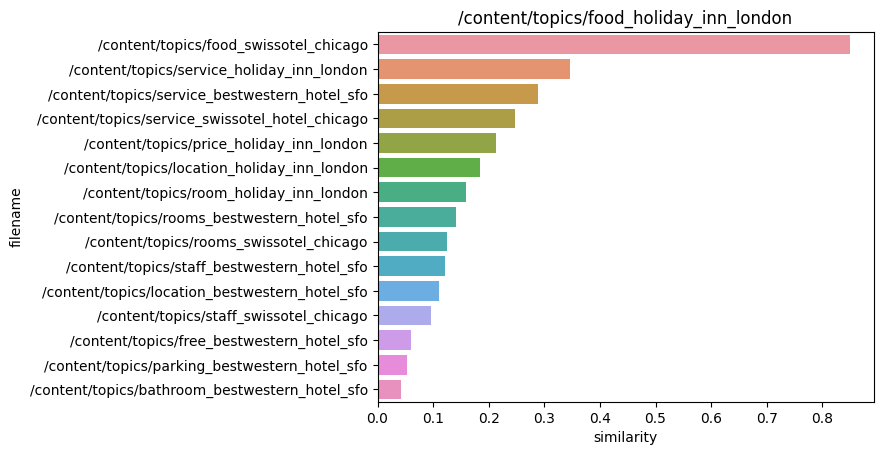

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은은 제외
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도 큰 순으로 hotel_index를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

## CH08.09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분

In [26]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 27.0 MB/s eta 0:00:00


In [27]:
# 데이터 로딩
import pandas as pd

train_df=pd.read_csv('/content/ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [28]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [30]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경 (정규 표현식으로 \d는 숫자를 의미)
train_df['document'] = train_df['document'].apply(lambda x: re.sub(r'\d+', ' ', x))

# 테스트 데이터 세트를 로딩하고 동일하게 null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x: re.sub(r'\d+', ' ', x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [31]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# twitter 객체의 morphs() 객체를 이용한 tokenizer 사용. ngram_range=(1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [33]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0)

# 파라미터 C의 최적화를 위해 GridSearchCV 이용
params = {'C':[1, 3.5, 4.5, 5.5, 10]}

grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 3.5} 0.8593


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 gridsearchcv에서 최적 파라미터로 학습된 calssifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86186
